In [40]:
import pandas as pd
import numpy as np



In [41]:
dim_df = pd.read_csv(r'C:/Users/ASUS/Downloads/IPL-Predictor-Past-Trends-Future-Champions-main/IPL-Predictor-Excel-Files/fact_bating_summaryy.csv', encoding='cp1252')

In [3]:
dim_df.columns

Index(['match_id', 'match', 'teamInnings', 'battingPos', 'batsmanName',
       'out/not_out', 'runs', 'balls', '4s', '6s', 'SR', 'matchDate'],
      dtype='object')

In [26]:
dim_df = dim_df.loc[:, ~dim_df.columns.str.contains('^Unnamed')]


In [27]:
dim_df.columns

Index(['match_id', 'match', 'teamInnings', 'battingPos', 'batsmanName',
       'out/not_out', 'runs', 'balls', '4s', '6s', 'SR', 'matchDate'],
      dtype='object')

In [28]:
dim_df.head(10)

,match_id,match,teamInnings,battingPos,batsmanName,out/not_out,runs,balls,4s,6s,SR,matchDate
0,T202715,Royals Vs Titans,Royals,1.0,YashasviJaiswal,out,22,16.0,1.0,2.0,137.5,5/29/2022
1,T202715,Royals Vs Titans,Royals,2.0,JosButtler,out,39,35.0,5.0,0.0,111.42,5/29/2022
2,T202715,Royals Vs Titans,Royals,3.0,SanjuSamson,out,14,11.0,2.0,0.0,127.27,5/29/2022
3,T202715,Royals Vs Titans,Royals,4.0,DevduttPadikkal,out,2,10.0,0.0,0.0,20,5/29/2022
4,T202715,Royals Vs Titans,Royals,5.0,ShimronHetmyer,out,11,12.0,2.0,0.0,91.66,5/29/2022
5,T202715,Royals Vs Titans,Royals,6.0,RavichandranAshwin,out,6,9.0,0.0,0.0,66.66,5/29/2022
6,T202715,Royals Vs Titans,Royals,7.0,RiyanParag,out,15,15.0,1.0,0.0,100,5/29/2022
7,T202715,Royals Vs Titans,Royals,8.0,TrentBoult,out,11,7.0,0.0,1.0,157.14,5/29/2022
8,T202715,Royals Vs Titans,Royals,9.0,ObedMcCoy,out,8,5.0,0.0,1.0,160,5/29/2022
9,T202715,Royals Vs Titans,Royals,10.0,PrasidhKrishna,not_out,0,0.0,0.0,0.0,-,5/29/2022


In [29]:
dim_df.tail(10)

,match_id,match,teamInnings,battingPos,batsmanName,out/not_out,runs,balls,4s,6s,SR,matchDate
3447,T210026,Kolkata Knight Riders VS Sunrisers Hyderabad,SRH,6.0,Heinrich Klaasen,out,16,17.0,1.0,0.0,94.12,19-May-24
3448,T210026,Kolkata Knight Riders VS Sunrisers Hyderabad,SRH,7.0,Shahbaz Ahmed,out,8,7.0,0.0,1.0,114.29,19-May-24
3449,T210026,Kolkata Knight Riders VS Sunrisers Hyderabad,SRH,8.0,Abdul Samad,out,4,4.0,0.0,0.0,100,19-May-24
3450,T210026,Kolkata Knight Riders VS Sunrisers Hyderabad,SRH,9.0,Pat Cummins,out,24,19.0,2.0,1.0,126.32,19-May-24
3451,T210026,Kolkata Knight Riders VS Sunrisers Hyderabad,SRH,10.0,Jaydev Unadkat,out,4,11.0,0.0,0.0,36.36,19-May-24
3452,T210026,Kolkata Knight Riders VS Sunrisers Hyderabad,SRH,11.0,Bhuvneshwar Kumar,not_out,0,1.0,0.0,0.0,0,19-May-24
3453,T210026,Kolkata Knight Riders VS Sunrisers Hyderabad,KKR,1.0,Rahmanullah Gurbaz,out,39,32.0,5.0,2.0,121.88,19-May-24
3454,T210026,Kolkata Knight Riders VS Sunrisers Hyderabad,KKR,2.0,Sunil Narine,out,6,2.0,0.0,1.0,300,19-May-24
3455,T210026,Kolkata Knight Riders VS Sunrisers Hyderabad,KKR,3.0,Venkatesh Iyer,not_out,52,26.0,4.0,3.0,200,19-May-24
3456,T210026,Kolkata Knight Riders VS Sunrisers Hyderabad,KKR,4.0,Shreyas Iyer,not_out,6,3.0,1.0,0.0,200,19-May-24


In [30]:
dim_df.shape

(3457, 12)

In [31]:
# Mapping of short or alternate names to full team names
team_name_map = {
    'KKR': 'Kolkata Knight Riders',
    'RCB': 'Royal Challengers Bangalore',
    'mi': 'Mumbai Indians',
    'MI': 'Mumbai Indians',
    'Mumbai':'Mumbai Indians',
    'Capitals': 'Delhi Capitals',
    'DC': 'Delhi Capitals',
    'Punjab Kings': 'Punjab Kings',
    'Super Kings': 'Chennai Super Kings',
    'CSK': 'Chennai Super Kings',
    'Royals': 'Rajasthan Royals',
    'RR': 'Rajasthan Royals',
    'Sunrisers': 'Sunrisers Hyderabad',
    'SRH': 'Sunrisers Hyderabad',
    'Titans': 'Gujarat Titans',
    'GT': 'Gujarat Titans',
    'Super Giants': 'Lucknow Super Giants',
    'LSG': 'Lucknow Super Giants',
    'rcb': 'Royal Challengers Bengaluru',
    'rr': 'Rajasthan Royals',
    'srh': 'Sunrisers Hyderabad',
    'pk': 'Punjab Kings',
    'lsg': 'Lucknow Super Giants',
    'csk': 'Chennai Super Kings',
    'kkr': 'Kolkata Knight Riders',
    'gt': 'Gujarat Titans',
    'dc': 'Delhi Capitals',
    'lrg': 'Lucknow Super Giants',
    'kolkata':'Kolkata Knight Riders',
    'rajasthan':'Rajasthan Royals',
    'gujrat':'Gujarat Titans',
    'Royal Challengers Bangalore':'Royal Challengers Bengaluru'
}

# Apply mapping to all team columns
dim_df['teamInnings'] = dim_df['teamInnings'].replace(team_name_map)
dim_df['match'] = dim_df['match'].replace(team_name_map)



In [32]:
def standardize_match_name(match_string):
    try:
        team1, team2 = match_string.split(' Vs ')
        team1_full = team_name_map.get(team1.strip(), team1.strip())
        team2_full = team_name_map.get(team2.strip(), team2.strip())
        return f"{team1_full} Vs {team2_full}"
    except:
        return match_string  # fallback if not in expected format

dim_df['match'] = dim_df['match'].apply(standardize_match_name)


In [33]:
dim_df.head(10)

,match_id,match,teamInnings,battingPos,batsmanName,out/not_out,runs,balls,4s,6s,SR,matchDate
0,T202715,Rajasthan Royals Vs Gujarat Titans,Rajasthan Royals,1.0,YashasviJaiswal,out,22,16.0,1.0,2.0,137.5,5/29/2022
1,T202715,Rajasthan Royals Vs Gujarat Titans,Rajasthan Royals,2.0,JosButtler,out,39,35.0,5.0,0.0,111.42,5/29/2022
2,T202715,Rajasthan Royals Vs Gujarat Titans,Rajasthan Royals,3.0,SanjuSamson,out,14,11.0,2.0,0.0,127.27,5/29/2022
3,T202715,Rajasthan Royals Vs Gujarat Titans,Rajasthan Royals,4.0,DevduttPadikkal,out,2,10.0,0.0,0.0,20,5/29/2022
4,T202715,Rajasthan Royals Vs Gujarat Titans,Rajasthan Royals,5.0,ShimronHetmyer,out,11,12.0,2.0,0.0,91.66,5/29/2022
5,T202715,Rajasthan Royals Vs Gujarat Titans,Rajasthan Royals,6.0,RavichandranAshwin,out,6,9.0,0.0,0.0,66.66,5/29/2022
6,T202715,Rajasthan Royals Vs Gujarat Titans,Rajasthan Royals,7.0,RiyanParag,out,15,15.0,1.0,0.0,100,5/29/2022
7,T202715,Rajasthan Royals Vs Gujarat Titans,Rajasthan Royals,8.0,TrentBoult,out,11,7.0,0.0,1.0,157.14,5/29/2022
8,T202715,Rajasthan Royals Vs Gujarat Titans,Rajasthan Royals,9.0,ObedMcCoy,out,8,5.0,0.0,1.0,160,5/29/2022
9,T202715,Rajasthan Royals Vs Gujarat Titans,Rajasthan Royals,10.0,PrasidhKrishna,not_out,0,0.0,0.0,0.0,-,5/29/2022


In [42]:
dim_df['runs'] = pd.to_numeric(dim_df['runs'], errors='coerce')
# Convert 'runs' column to numeric (force non-numeric to NaN)
# Group by batsman and sum runs
top_batsmen = dim_df.groupby('batsmanName')['runs'].sum().sort_values(ascending=False).head(10)

print(top_batsmen)

batsmanName
ShubmanGill        1373.0
JosButtler         1255.0
FafduPlessis       1198.0
ViratKohli          980.0
RuturajGaikwad      958.0
DavidWarner         948.0
DevonConway         924.0
SuryakumarYadav     908.0
KLRahul             890.0
YashasviJaiswal     883.0
Name: runs, dtype: float64


In [12]:
# Count number of 'not_out' entries per batsman
not_out_counts = (
    dim_df[dim_df['out/not_out'].str.lower() == 'not_out']
    .groupby('batsmanName')
    .size()
    .sort_values(ascending=False)
)

# Display top 10 batsmen with most not outs
print(not_out_counts.head(10))


batsmanName
MSDhoni               14
KuldeepYadav          14
DavidMiller           14
ShimronHetmyer        13
DineshKarthik         11
RahulTewatia          11
RavichandranAshwin     9
TimDavid               9
TrentBoult             9
AxarPatel              9
dtype: int64


In [48]:

# Convert 'runs' column to numeric
dim_df['runs'] = pd.to_numeric(dim_df['runs'], errors='coerce')

# Group by teamInnings and batsmanName, sum runs, and sort
top_batsmen_by_team = dim_df.groupby(['teamInnings', 'batsmanName'])['runs'].sum().sort_values(ascending=False)

print(top_batsmen_by_team.head(10))

teamInnings   batsmanName    
Titans        ShubmanGill        1373.0
Royals        JosButtler         1255.0
RCB           FafduPlessis       1198.0
              ViratKohli          980.0
Super Kings   RuturajGaikwad      958.0
Capitals      DavidWarner         948.0
Super Kings   DevonConway         924.0
Mumbai        SuryakumarYadav     908.0
Super Giants  KLRahul             890.0
Royals        YashasviJaiswal     883.0
Name: runs, dtype: float64


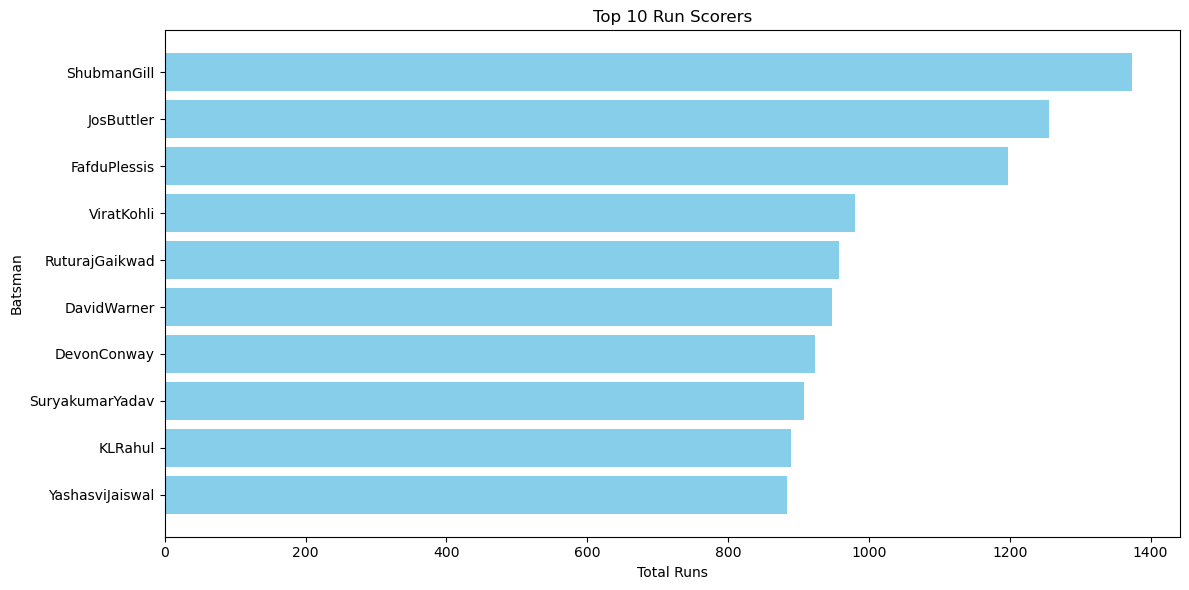

In [43]:
import matplotlib.pyplot as plt

top_runs = dim_df.groupby('batsmanName')['runs'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
plt.barh(top_runs.index[::-1], top_runs.values[::-1], color='skyblue')
plt.title('Top 10 Run Scorers')
plt.xlabel('Total Runs')
plt.ylabel('Batsman')
plt.tight_layout()
plt.show()


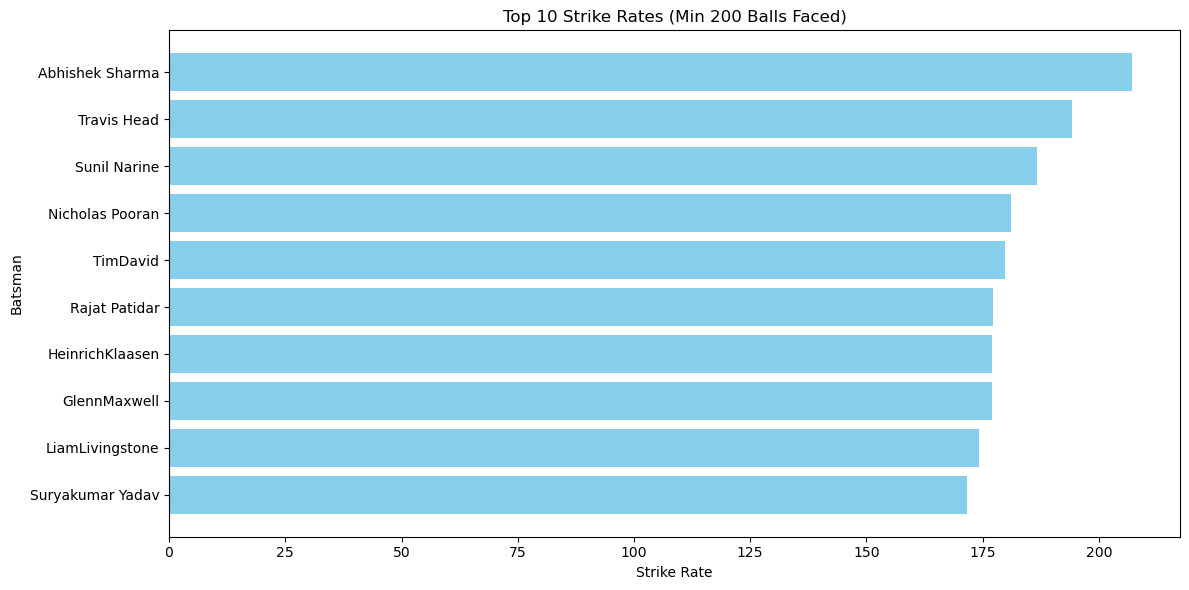

In [128]:
dim_df['runs'] = pd.to_numeric(dim_df['runs'], errors='coerce')
dim_df['balls'] = pd.to_numeric(dim_df['balls'], errors='coerce')

# Keep only batsmen who have played more than 200 balls
batsmen = dim_df.groupby('batsmanName').filter(lambda x: x['balls'].sum() > 200)

# Calculate strike rate for each batsman
strike_rate = batsmen.groupby('batsmanName').agg({'runs': 'sum', 'balls': 'sum'})
strike_rate['SR'] = (strike_rate['runs'] / strike_rate['balls']) * 100

# Pick top 10 batsmen by strike rate
top_sr = strike_rate.sort_values(by='SR', ascending=False).head(10)

# Plot bar chart
plt.figure(figsize=(12,6))
plt.barh(top_sr.index[::-1], top_sr['SR'][::-1], color='skyblue')
plt.title('Top 10 Strike Rates (Min 200 Balls Faced)')
plt.xlabel('Strike Rate')
plt.ylabel('Batsman')
plt.tight_layout()
plt.show()


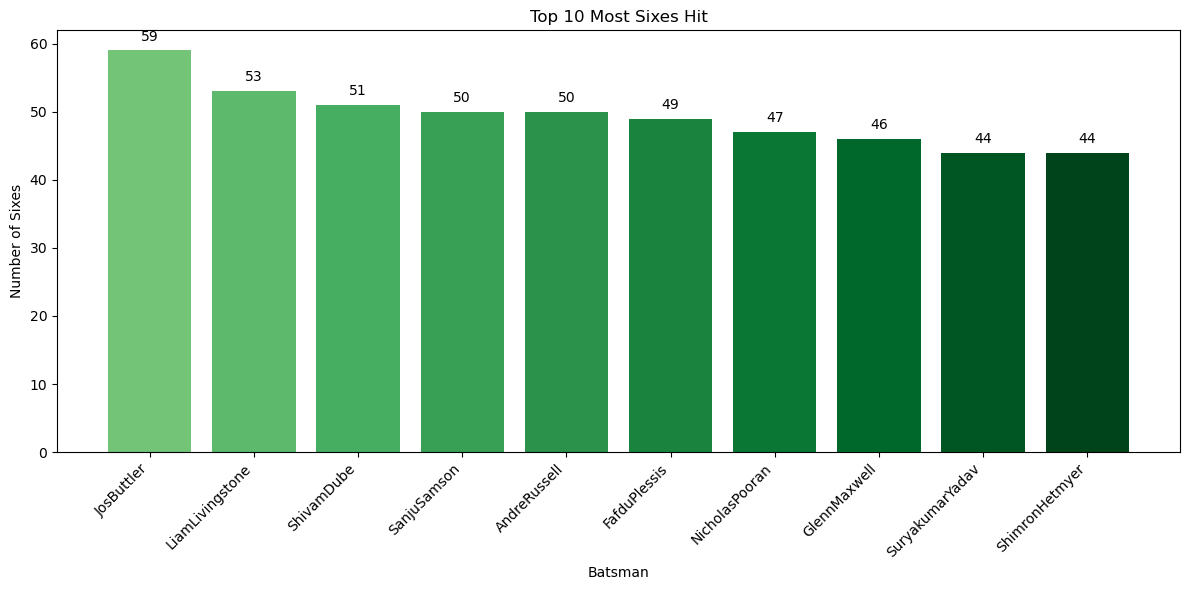

In [45]:
import numpy as np
import matplotlib.pyplot as plt

top_sixes = dim_df.groupby('batsmanName')['6s'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
colors = plt.cm.Greens(np.linspace(0.5, 1, len(top_sixes)))  # gradient green
bars = plt.bar(top_sixes.index, top_sixes.values, color=colors)
plt.title('Top 10 Most Sixes Hit')
plt.ylabel('Number of Sixes')
plt.xlabel('Batsman')
plt.xticks(rotation=45, ha='right')

# Add value labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, int(yval), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


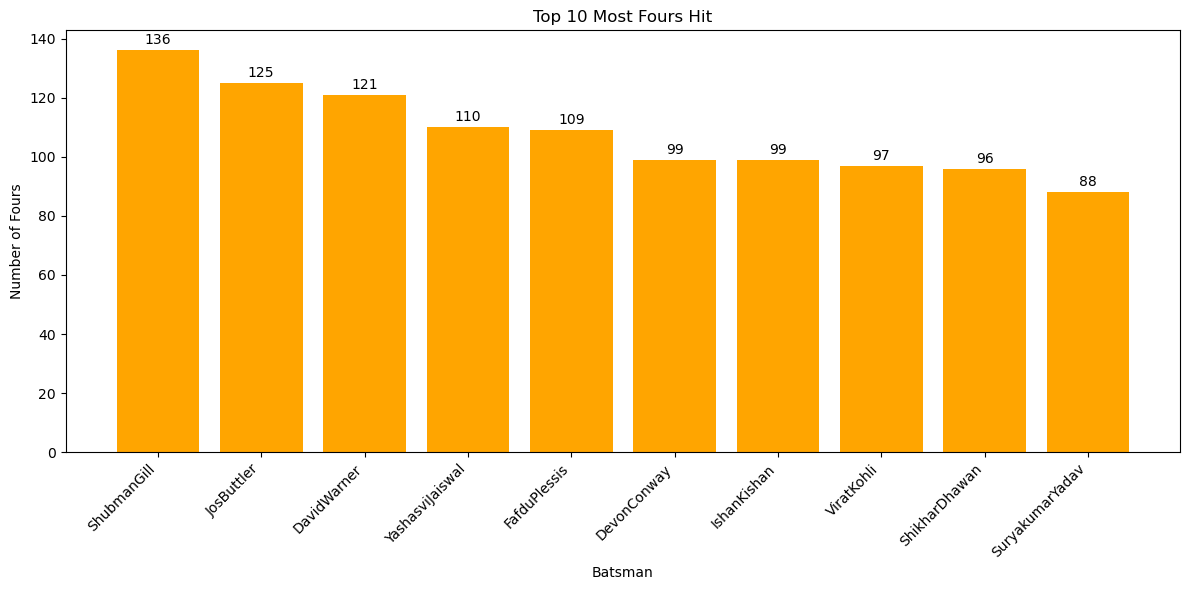

In [46]:
import matplotlib.pyplot as plt

top_fours = dim_df.groupby('batsmanName')['4s'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
bars = plt.bar(top_fours.index, top_fours.values, color='orange')
plt.title('Top 10 Most Fours Hit')
plt.ylabel('Number of Fours')
plt.xlabel('Batsman')
plt.xticks(rotation=45, ha='right')

# Add value labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, int(yval), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


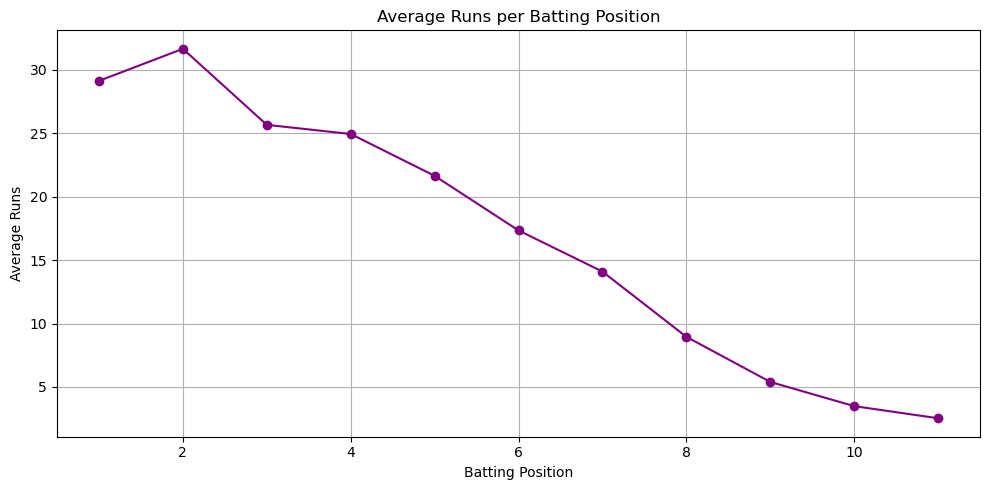

In [47]:
# Ensure 'runs' column is numeric
dim_df['runs'] = pd.to_numeric(dim_df['runs'], errors='coerce')

# Group by batting position and calculate mean
avg_pos_runs = dim_df.groupby('battingPos')['runs'].mean()

# Plotting
plt.figure(figsize=(10,5))
plt.plot(avg_pos_runs.index, avg_pos_runs.values, marker='o', color='purple')
plt.title('Average Runs per Batting Position')
plt.xlabel('Batting Position')
plt.ylabel('Average Runs')
plt.grid(True)
plt.tight_layout()
plt.show()


In [49]:
# Columns to clean
columns_to_clean = ['battingPos', 'runs', 'balls', '4s', '6s']

# Step 1: Remove '*' and convert to float first (in case of '5*')
for col in columns_to_clean:
    dim_df[col] = dim_df[col].astype(str).str.replace('*', '', regex=False)
    dim_df[col] = pd.to_numeric(dim_df[col], errors='coerce').astype('Int64')  # Convert to integer

dim_df['SR'] = pd.to_numeric(dim_df['SR'], errors='coerce').round(2)  # Or use .astype('Int64') if you want no decimals



In [62]:
dim_df.columns

Index(['match_id', 'match', 'teamInnings', 'battingPos', 'batsmanName',
       'out/not_out', 'runs', 'balls', '4s', '6s', 'SR'],
      dtype='object')

In [50]:
import pandas as pd


# Display the row(s) with Match ID 'T210022'
row_to_view = dim_df[dim_df['match_id'] == 'T210022']
print("Row(s) with match_id 'T210022':")
print(row_to_view)


Row(s) with match_id 'T210022':
     match_id                                      match teamInnings  \
3390  T210022  Rajasthan Royals VS Kolkata Knight Riders          RR   
3391  T210022  Rajasthan Royals VS Kolkata Knight Riders         KKR   

      battingPos batsmanName out/not_out  runs  balls    4s    6s  SR  \
3390        <NA>         NaN         NaN  <NA>   <NA>  <NA>  <NA> NaN   
3391        <NA>         NaN         NaN  <NA>   <NA>  <NA>  <NA> NaN   

      matchDate  
3390  16-May-24  
3391  16-May-24  


In [51]:
# Delete the row(s) with Match ID 'T210022'
dim_df = dim_df[dim_df['match_id'] != 'T210022']

In [52]:
print(dim_df[dim_df['match_id'] == 'T210022'])


Empty DataFrame
Columns: [match_id, match, teamInnings, battingPos, batsmanName, out/not_out, runs, balls, 4s, 6s, SR, matchDate]
Index: []


In [53]:
# Save to Excel file
dim_df.to_excel('cleaned_ipl_data_batsman.xlsx', index=False)


In [54]:
from IPython.display import FileLink
FileLink('cleaned_ipl_data_batsman.xlsx')


C:\Users\ASUS\project ipl predictor\cleaned_ipl_data_batsman.xlsx